## Gaussian Normalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.array([1, 2, 3, 4, 5])  # np.array로 List 객체 변환
mean = arr.mean()  # 평균 구하기
std = arr.std()  # 표준편차 구하기
vfunc = np.vectorize(lambda x: (x - mean) / std)
new_arr = vfunc(arr)
new_arr

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

## Gaussian Normalization Graph Implementation

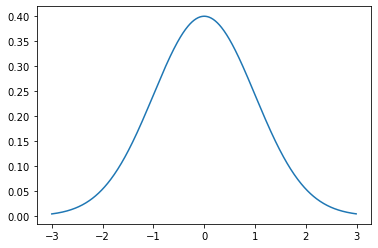

In [3]:
mean = 0
std = 1
variance = np.square(std)
x = np.arange(-3,3,.01)
f = np.exp(-np.square(x - mean)/ 2 * variance)/(np.sqrt(2 * np.pi * variance))
## Gaussian Normalization
plt.plot(x,f)
plt.show()

### Eigen Vector, Eigen Value

In [4]:
array = [[1, 2], [3, 4]]
eigenvalues, eigenvectors = np.linalg.eig(array)  # Eigenvalue, Eigenvector of Covarience Matrix

print("eigenvalue: ", eigenvalues)
print("eigenvector: ", eigenvectors)
print("eigenvalue * eigenvector: ", eigenvalues * eigenvectors)
print("array * eigenvector: ", array @ eigenvectors)

eigenvalue:  [-0.37228132  5.37228132]
eigenvector:  [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
eigenvalue * eigenvector:  [[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]
array * eigenvector:  [[ 0.30697009 -2.23472698]
 [-0.21062466 -4.88542751]]


### Eigen Vector, Eigen Value, PCA

In [5]:
array = np.random.multivariate_normal([0, 0], [[1, 10], [10, 100]], 1000)  # multivariate (mean, covarience matrix, samples)
cov = np.cov(array.T)  # Covarience Matrix ((index x, index y) x에 대해, y가 얼마나 변화 하는가?)
print(cov)
eigenvalues, eigenvectors = np.linalg.eig(cov)  # Eigenvalue, Eigenvector of Covarience Matrix

print("eigenvalue: ", eigenvalues)
print("eigenvector: ", eigenvectors)

[[  1.0363047   10.36304703]
 [ 10.36304703 103.63047024]]
eigenvalue:  [  0.         104.66677495]
eigenvector:  [[-0.99503719 -0.09950372]
 [ 0.09950372 -0.99503719]]


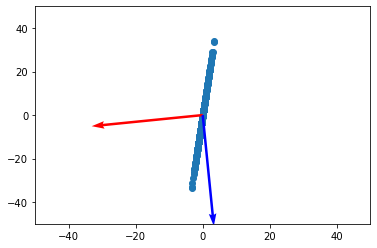

In [6]:
plt.scatter(array[:, 0], array[:, 1])
plt.quiver([0, 0], [0, 0], eigenvectors[:, 0], eigenvectors[:, 1], color=['r', 'b'], scale=3)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

### Numeric Differentiation

In [7]:
def diff(f, index, *args):
    delta = 1e-4  # h
    new_args = list(args)
    new_args[index] += delta
    return (f(*new_args) - f(*args)) / delta  # f(x + h, y) - f(x, y) / h

diff(lambda x, y: x ** 2 + y ** 2, 0, 3, 3)  # f(x, y) = x^2 + y^2

6.000099999994291

### Graph

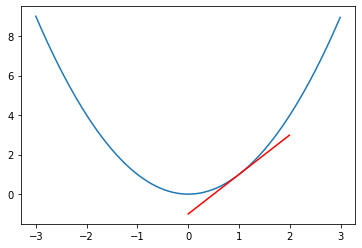

In [8]:
# 원래 그래프
x = np.arange(-3,3,.01)
y = x ** 2

# tangent, 접선
d = diff(lambda x: x ** 2, 0, 1)
x_tangent = np.arange(0, 2, .01)
y_tangent = (x_tangent - 1) * d + 1

plt.plot(x, y)
plt.plot(x_tangent, y_tangent, color='r')
plt.show()

### Computational Graph

In [9]:
class MulLayer:
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

In [10]:
class AddLayer:
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [11]:
chicken = 17000
num = 3
delivery_fee = 3000

mul_chicken = MulLayer()
add_fee = AddLayer()

chicken_price = mul_chicken.forward(chicken, num)
total_price = add_fee.forward(chicken_price, delivery_fee)
total_price

54000

In [12]:
d_price = 1
d_chicken_price, d_delivery_fee = add_fee.backward(d_price)
d_chicken, d_num = mul_chicken.backward(d_chicken_price)

print("d_chicken_price: ", d_chicken_price)
print("d_delivery_fee: ", d_delivery_fee)
print("d_chicken: ", d_chicken)
print("d_num: ", d_num)

d_chicken_price:  1
d_delivery_fee:  1
d_chicken:  3
d_num:  17000
